<a href="https://colab.research.google.com/github/lwallac2/Bank-Marketing/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing

print("Current TensorFlow version is", tf.__version__)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading in the data as bank dataframe
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified.csv", sep=',')

#Verifying that we can see the data
adult.head()

Current TensorFlow version is 2.8.0


,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


# Question 1

In [2]:
adult_dl = pd.DataFrame(adult, columns = ['age', 'educationyears', 'race','hoursperweek','incomeUSD'])
adult_dl.head()

,age,educationyears,race,hoursperweek,incomeUSD
0,39,13,White,40,43747
1,50,13,White,13,38907
2,38,9,White,40,25055
3,53,7,Black,40,26733
4,28,13,Black,40,23429


# Question 3

In [3]:
adult_dl = pd.get_dummies(adult_dl, columns=['race'], prefix='', prefix_sep='')
adult_dl.head()

,age,educationyears,hoursperweek,incomeUSD,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,13,40,43747,0,0,0,0,1
1,50,13,13,38907,0,0,0,0,1
2,38,9,40,25055,0,0,0,0,1
3,53,7,40,26733,0,0,1,0,0
4,28,13,40,23429,0,0,1,0,0


# Question 2

In [4]:
train_dataset = adult_dl.sample(frac=0.8, random_state=0)
test_dataset = adult_dl.drop(train_dataset.index)

In [5]:
train_features = adult_dl.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('educationyears')
test_labels = test_features.pop('educationyears')

In [7]:
normalizer = preprocessing.Normalization(axis=-1)

In [8]:
normalizer.adapt(np.array(train_features))


In [9]:
print(normalizer.mean.numpy())

[[3.8581665e+01 4.0437420e+01 5.6583895e+04 9.5512960e-03 3.1909321e-02
  9.5943078e-02 8.3228461e-03 8.5427368e-01]]


In [10]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('Original data:', first)
  print()
  print('Normalized data:', normalizer(first).numpy())

Original data: [[   39    40 43747     0     0     0     0     1]]

Normalized data: [[ 0.03 -0.04 -0.29 -0.1  -0.18 -0.33 -0.09  0.41]]


In [11]:
# First, we build the normalization layer:
age_new = np.array(train_features['age'])

age_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
age_normalizer.adapt(age_new)

# Question 4

In [12]:
def build_and_compile_model(norm):
  model = keras.Sequential([                 # Here you are setting up the keras.Sequential architecture
      norm,                                  # This is the normalizer function we built before
      layers.Dense(64, activation='relu'),   # Here is the first hidden layer--64 nodes, built with the relu function
      layers.Dense(64, activation='relu'),   # Here is the second hidden layer, also built with the relu function
      layers.Dense(1)                        # Here is the Dense layer for a single output because we are working on a REGRESSION
  ])                                         # AND WE'RE DONE WITH BUILDING THE MODEL!

  model.compile(loss='mean_absolute_error',   # Now we configure the runtime for our model; the loss function is mean absolute error--makes sense for a regression!
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [13]:
dnn_age_model = build_and_compile_model(age_normalizer)

In [14]:
dnn_age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


# Question 5 

In [15]:
%%time
history = dnn_age_model.fit(
    train_features['age'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=32)

Epoch 1/32
814/814 [==============================] - 3s 2ms/step - loss: 2.5797 - val_loss: 1.9025
Epoch 2/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8762 - val_loss: 1.8969
Epoch 3/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8727 - val_loss: 1.9019
Epoch 4/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8740 - val_loss: 1.8978
Epoch 5/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8750 - val_loss: 1.8985
Epoch 6/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8732 - val_loss: 1.8942
Epoch 7/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8712 - val_loss: 1.9045
Epoch 8/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8721 - val_loss: 1.9211
Epoch 9/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8722 - val_loss: 1.8963
Epoch 10/32
814/814 [==============================] - 2s 2ms/step - loss: 1.8681 - val_loss: 1.8899

In [16]:
%%time
history = dnn_age_model.fit(
    train_features['age'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8352 - val_loss: 1.8502
Epoch 2/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8333 - val_loss: 1.8505
Epoch 3/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8319 - val_loss: 1.8781
Epoch 4/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8346 - val_loss: 1.8612
Epoch 5/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8337 - val_loss: 1.8494
Epoch 6/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8300 - val_loss: 1.8633
Epoch 7/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8321 - val_loss: 1.8615
Epoch 8/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8328 - val_loss: 1.8486
Epoch 9/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8330 - val_loss: 1.8654
Epoch 10/100
814/814 [==============================] - 2s 2ms/step - loss: 1.8315 - val_lo

# Question 6

In [17]:
# First, we build the normalization layer:
income_new = np.array(train_features['incomeUSD'])

income_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
income_normalizer.adapt(income_new)

In [18]:
dnn_income_model = build_and_compile_model(income_normalizer)

In [19]:
dnn_income_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [20]:
%%time
history = dnn_income_model.fit(
    train_features['incomeUSD'], train_labels,
    validation_split=0.2,
    verbose=1, epochs=10)

Epoch 1/10
814/814 [==============================] - 2s 2ms/step - loss: 2.5214 - val_loss: 1.8482
Epoch 2/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8238 - val_loss: 1.8621
Epoch 3/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8199 - val_loss: 1.8375
Epoch 4/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8180 - val_loss: 1.8353
Epoch 5/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8195 - val_loss: 1.8208
Epoch 6/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8168 - val_loss: 1.8233
Epoch 7/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8109 - val_loss: 1.8211
Epoch 8/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8125 - val_loss: 1.8188
Epoch 9/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8087 - val_loss: 1.8142
Epoch 10/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8082 - val_loss: 1.8171

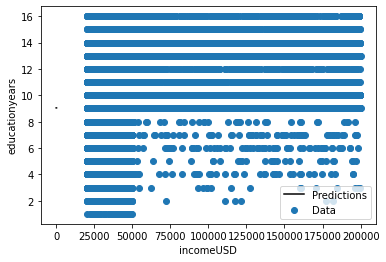

In [31]:
x = tf.linspace(0.0, 250, 251)
y = dnn_income_model.predict(x)

def plot_income(x, y):
  plt.scatter(train_features['incomeUSD'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('incomeUSD')
  plt.ylabel('educationyears')
  plt.legend()
plot_income(x, y) 

In [23]:
test_results = {}

test_results['dnn_income_model'] = dnn_income_model.evaluate(
    test_features['incomeUSD'],
    test_labels, verbose=0)

In [24]:
test_results['dnn_income_model'] = dnn_income_model.evaluate(
    test_features['incomeUSD'], test_labels,
    verbose=0)

In [25]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [26]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=10)

Epoch 1/10
814/814 [==============================] - 3s 3ms/step - loss: 2.4413 - val_loss: 1.8284
Epoch 2/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8121 - val_loss: 1.8158
Epoch 3/10
814/814 [==============================] - 2s 2ms/step - loss: 1.8019 - val_loss: 1.8174
Epoch 4/10
814/814 [==============================] - 2s 2ms/step - loss: 1.7961 - val_loss: 1.8066
Epoch 5/10
814/814 [==============================] - 3s 3ms/step - loss: 1.7897 - val_loss: 1.8077
Epoch 6/10
814/814 [==============================] - 3s 4ms/step - loss: 1.7868 - val_loss: 1.7971
Epoch 7/10
814/814 [==============================] - 2s 2ms/step - loss: 1.7821 - val_loss: 1.8069
Epoch 8/10
814/814 [==============================] - 2s 2ms/step - loss: 1.7789 - val_loss: 1.7923
Epoch 9/10
814/814 [==============================] - 2s 2ms/step - loss: 1.7777 - val_loss: 1.7949
Epoch 10/10
814/814 [==============================] - 2s 2ms/step - loss: 1.7697 - val_loss: 1.8170

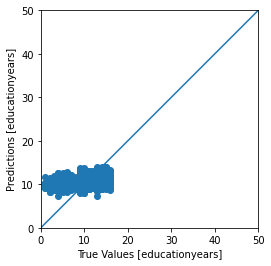

In [27]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [educationyears]')
plt.ylabel('Predictions [educationyears]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [28]:
test_predictions = dnn_model.predict(test_features).flatten()

In [29]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [30]:
pd.DataFrame(test_results, index=['Mean absolute error [educationyears]']).T

,Mean absolute error [educationyears]
dnn_income_model,1.793391
dnn_model,1.785616


# Question 7

My two models have a very low mean absolute error and are nearly identical. The dnn_model is slightly better with an error of .02 less, which is marginally indifferent. Since both models have very low mean absolute errors there are very good a predicting and either model would be a great model for predicting. 